# Deep Learning for Time Series Analysis. 

> LSTM : Long Short Term Memory Units (RNN species). 

>Divyanshu | Oil & Gas DS/ML

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('C:/Users/dvyas/UDEMY_TSA_FINAL/Data/airline_passengers.csv',index_col=0, parse_dates=True)

In [9]:
df.index.freq = 'MS'

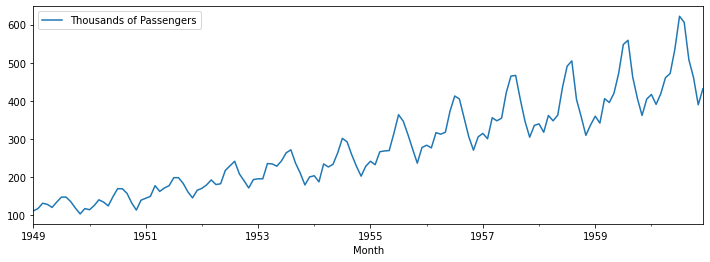

In [11]:
df.plot(figsize=(12,4))

In [13]:
len(df) - 24

120

## Train-Test Split

In [14]:
train = df.iloc[:120]
test = df.iloc[120:]

## Feature Scaling : So the Error doesn't blow up.

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(train)

MinMaxScaler()

In [18]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Batch Generation : An LSTM mandate.

In [19]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
# define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [21]:
X0,y0 = generator[0]

In [22]:
X0.shape

(1, 12, 1)

In [23]:
y0.shape

(1, 1)

In [24]:
# X0 - IS called the BatchX and it is a 3D array. Much like LSTM accepts. 
# y0 - is the BatchY and issa 2D array. Even though it is potentially 1D

**Here's what a Batch looks like** - 

[[[ BatchX ]]] , [[Batchy]]

i.e, ( 3D-X , 2D-y )

The shape of 3d-X is - (1,n_input,n_features) 

# Create and Compile & Fit LSTM model

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [27]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [28]:
# fit model
model.fit_generator(generator,epochs=100)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
108/108 [==============================] - 2s 19ms/step - loss: 0.0335
Epoch 2/100
108/108 [==============================] - 2s 19ms/step - loss: 0.0121
Epoch 3/100
108/108 [==============================] - 1s 13ms/step - loss: 0.0125
Epoch 4/100
108/108 [==============================] - 1s 13ms/step - loss: 0.0107
Epoch 5/100
108/108 [==============================] - 2s 17ms/step - loss: 0.0116
Epoch 6/100
108/108 [==============================] - 2s 18ms/step - loss: 0.0108
Epoch 7/100
108/108 [==============================] - 2s 20ms/step - loss: 0.0097
Epoch 8/100
108/108 [==============================] - 2s 16ms/step - loss: 0.0139
Epoch 9/100
108/108 [==============================] - 2s 21ms/step - loss: 0.0084: 0s - l
Epoch 10/100
108/108 [==============================] - 2s 21ms/step - loss: 0.0116: 0s - loss: 0.0
Epoch 11/100
108/108 [==============================] - 2s 21ms/step 

108/108 [==============================] - 2s 14ms/step - loss: 0.0013: 1s - - ETA: 0s - loss
Epoch 92/100
108/108 [==============================] - 2s 20ms/step - loss: 0.0018: 1s - los - ETA: 0s
Epoch 93/100
108/108 [==============================] - 2s 19ms/step - loss: 0.0015
Epoch 94/100
108/108 [==============================] - 2s 15ms/step - loss: 0.0015
Epoch 95/100
108/108 [==============================] - 1s 14ms/step - loss: 0.0016
Epoch 96/100
108/108 [==============================] - 2s 19ms/step - loss: 0.0015: 1s - lo - E
Epoch 97/100
108/108 [==============================] - 2s 19ms/step - loss: 0.0018
Epoch 98/100
108/108 [==============================] - 2s 19ms/step - loss: 0.0012: 0s - loss: 0
Epoch 99/100
108/108 [==============================] - 2s 19ms/step - loss: 0.0012: 0s - 
Epoch 100/100
108/108 [==============================] - 2s 19ms/step - loss: 0.0012


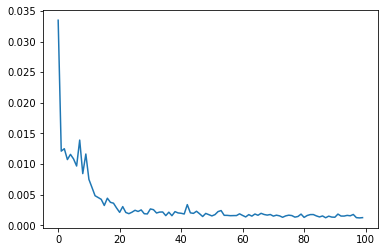

In [31]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## By Now, the Model has Learnt how to predict the 13th Month based on the values of the previous 12 months. 
>Now we have to Test it by forecasting into the Test Domain.

In [32]:
first_eval_batch = scaled_train[-12:]

first_eval_batch.shape

(12, 1)

In [33]:
X0.shape

(1, 12, 1)

In [34]:
shaped_first_eval_batch = first_eval_batch.reshape((1,n_input,n_features))

In [35]:
shaped_first_eval_batch.shape

(1, 12, 1)

In [38]:
#Let's predict the First value of test domain, using last 12 values of train domain.
yptest0 = model.predict(shaped_first_eval_batch)

In [48]:
yptest0[0][0] , scaled_test[0][0]

(0.61036694, 0.6384039900249376)

In [44]:
#PRETTY CLOSE.

In [45]:
#Similarly we'll devlop a FOR-LOOP to forecast all test values.

### Generalized Predictive For Loop

In [50]:
test_preds = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))


for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0][0]
    
    test_preds.append(current_pred)
    
    #Update current batch to the most recent 12 values
    #so that we can predict the 13th one.
    
    current_batch = np.append(current_batch[:,1:,:] , [[[current_pred]]], axis=1)

### The Predicted values are in MinMaxScaled range. 

> So we gotta invert them.

In [52]:
len(test_preds)

24

In [53]:
len(scaled_test)

24

In [56]:
#A sneak peak into the correctness of eval.
scaled_test[:2] , test_preds[:2]

(array([[0.63840399],
        [0.59351621]]),
 [0.61036694, 0.5970134])

In [58]:
actual_preds = scaler.inverse_transform([test_preds])

In [63]:
test['LSTM-Forecasts'] = actual_preds.reshape(24,1)

<ipython-input-63-961d49a1c598>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM-Forecasts'] = actual_preds.reshape(24,1)


In [64]:
test

,Thousands of Passengers,LSTM-Forecasts
Month,,
1959-01-01,360,348.757143
1959-02-01,342,343.402379
1959-03-01,406,359.048515
1959-04-01,396,363.433358
1959-05-01,420,392.867316
1959-06-01,472,458.570501
1959-07-01,548,518.371147
1959-08-01,559,522.232142
1959-09-01,463,446.157754


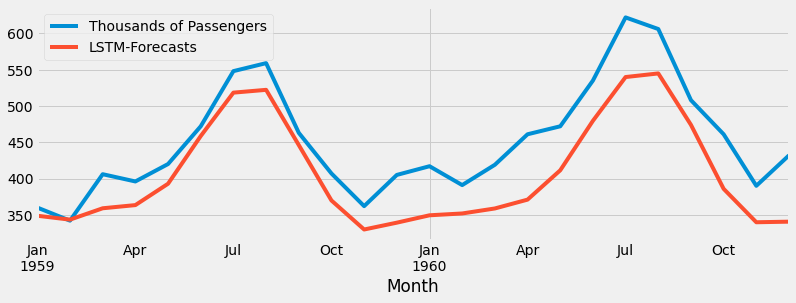

In [67]:
plt.style.use('fivethirtyeight')
test.plot(figsize=(12,4))

### Optional- Visual Evaluation

In [68]:
#Training Preds.

In [71]:
trainpreds = model.predict(generator)

In [72]:
len(trainpreds)

108

In [73]:
actualtrainpreds = scaler.inverse_transform(trainpreds)

In [78]:
df['LSTM-Fit'] = np.empty(shape=(len(df),1))

In [87]:
df['LSTM-Fit'][:108] = actualtrainpreds.reshape(108)

<ipython-input-87-4263c9077e26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LSTM-Fit'][:108] = actualtrainpreds.reshape(108)


In [88]:
finaldf = pd.conc

,Thousands of Passengers,LSTM-Fit
Month,,
1949-01-01,112,1.239158e+02
1949-02-01,118,1.273263e+02
1949-03-01,132,1.416507e+02
1949-04-01,129,1.451898e+02
1949-05-01,121,1.376197e+02
...,...,...
1960-08-01,606,1.162438e-319
1960-09-01,508,1.162487e-319
1960-10-01,461,1.162536e-319


In [92]:
df['LSTM-Fit'][108:] = np.nan

<ipython-input-92-0f9ba1c57a0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LSTM-Fit'][108:] = np.nan


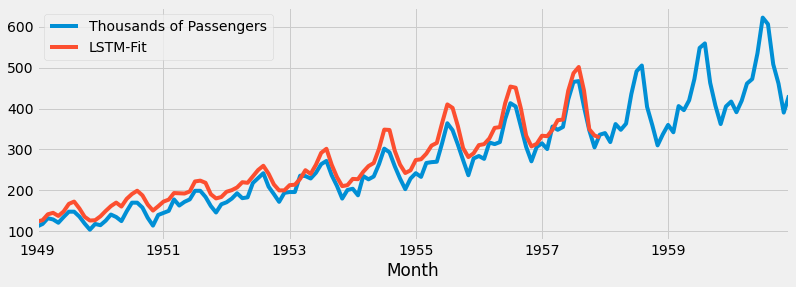

In [94]:
df.plot(figsize=(12,4))

In [95]:
test

,Thousands of Passengers,LSTM-Forecasts
Month,,
1959-01-01,360,348.757143
1959-02-01,342,343.402379
1959-03-01,406,359.048515
1959-04-01,396,363.433358
1959-05-01,420,392.867316
1959-06-01,472,458.570501
1959-07-01,548,518.371147
1959-08-01,559,522.232142
1959-09-01,463,446.157754


In [96]:
x1 = df.index

In [97]:
x2 = test.index

In [98]:
x = np.append(x1,x2)

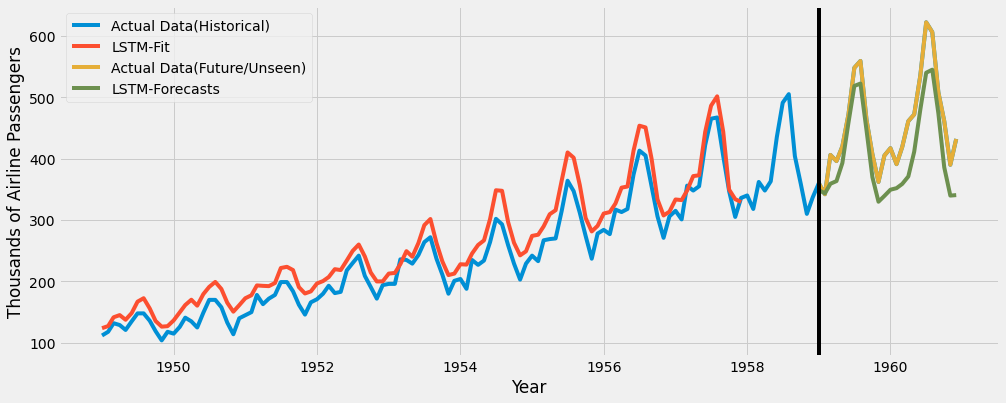

In [112]:
plt.figure(figsize=(15,6))
plt.plot(x1,df['Thousands of Passengers'],label='Actual Data(Historical)')
plt.plot(x1,df['LSTM-Fit'],label='LSTM-Fit')

plt.plot(x2,test['Thousands of Passengers'],label='Actual Data(Future/Unseen)')
plt.plot(x2,test['LSTM-Forecasts'],label='LSTM-Forecasts')

plt.axvline(x=x2[0],color='black')
plt.ylabel('Thousands of Airline Passengers')
plt.xlabel('Year')

plt.legend()

# Model Evaluation on UNSEEN - MSE

In [117]:
from sklearn.metrics import mean_squared_error,accuracy_score

In [114]:
ac = test['Thousands of Passengers']
preds = test['LSTM-Forecasts']

In [115]:
rmse = mean_squared_error(ac,preds)**0.5

In [120]:
100*rmse/np.mean(ac)

11.623822801099415

In [121]:
#11% Error. Not too Bad. 
#89% Accuracy.